In [ ]:
!pip install tensorflow

# **Importing tensorflow liberaries**

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import seaborn as snb
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, cv2
from PIL import Image
import numpy as np
import numpy as np

# ***Loading an Image from my Google drive***
# **Train set and Test set dat separatly**

In [2]:
train_data_path = ('/content/drive/MyDrive/Gender/train/');
test_data_path = ('/content/drive/MyDrive/Gender/test/');

# **Specify number of samples**
# **Declear variables**

In [3]:
SIZE = 500
dataset = []
label = []
dataset_test = []
label_test = []


# **Store Male training image to the dataset variable**
# ***Add label of these images***

In [4]:
Male_images = os.listdir(train_data_path + 'men/')
for i, image_name in enumerate(Male_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(train_data_path + 'men/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

# **Store Male Testset image to the test dataset variable**
# **Add label of these images**

In [5]:
Male_images_test = os.listdir(test_data_path + 'men/')
for i, image_name in enumerate(Male_images_test):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(test_data_path + 'men/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(1)

# **Store Female training image to the dataset variable**
# Add label of these images

In [6]:
Female_images = os.listdir(train_data_path + 'women/')
for i, image_name in enumerate(Female_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(train_data_path + 'women/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

# **Store Female testset image to the testset dataset variable**
# *Add label of these images*

In [7]:
Female_images = os.listdir(test_data_path + 'women/')
for i, image_name in enumerate(Female_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(test_data_path + 'women/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset_test.append(np.array(image))
        label_test.append(0)

In [8]:
dataset = np.array(dataset)
label = np.array(label)
dataset_test = np.array(dataset_test)
label_test = np.array(label_test)


In [9]:
X_train =  dataset
y_train = label
X_test =  dataset_test
y_test = label_test

In [10]:
print(dataset.shape)
print(label.shape)
print(dataset_test.shape)
print(label_test.shape)

(220, 500, 500, 3)
(220,)
(80, 500, 500, 3)
(80,)


In [11]:
print(label_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Text Label for this Image in Training dataset is: Female
Numebr Label for this Image in Training dataset is: 0


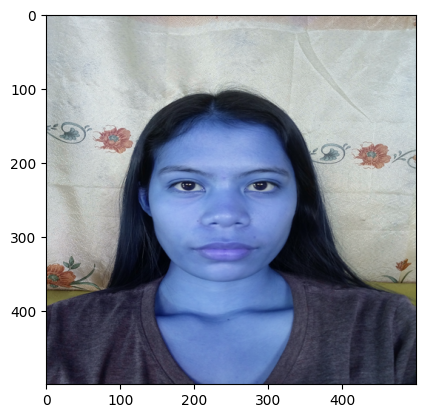

In [17]:
import random
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (SIZE, SIZE, 3)))
label_number = label[image_number]
image_label = ""
if label_number == 1:
  image_label= 'Male'
else:
  image_label= 'Female'
print("Text Label for this Image in Training dataset is:", image_label)
print("Numebr Label for this Image in Training dataset is:", label[image_number])

Text Label for this Image in Test dataset is: Male
Numebr Label for this Image in Test dataset is: 1


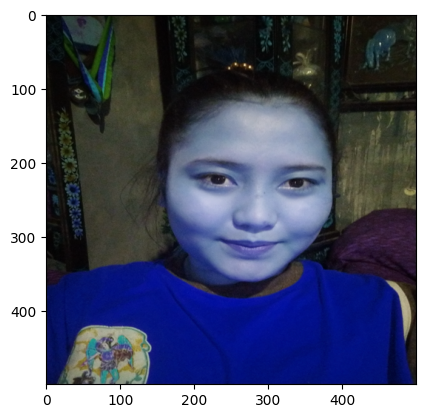

In [19]:
import random
image_number = random.randint(0, len(dataset_test)-1)
plt.imshow(np.reshape(dataset_test[image_number], (SIZE, SIZE, 3)))
label_number = label[image_number]
image_label = ""
if label_number == 1:
  image_label= 'Male'
else:
  image_label= 'Female'
print("Text Label for this Image in Test dataset is:", image_label)
print("Numebr Label for this Image in Test dataset is:", label[image_number])

**Pre-processing of an Image**

In [20]:
X_train = X_train/255
X_test = X_test/255
print(X_test.shape)
print(X_train.shape)

(80, 500, 500, 3)
(220, 500, 500, 3)


# ***Model Building using tensorflow keras***

# **CNN**

In [102]:
cnn = models.Sequential([
    layers.Conv2D(filters = 8, kernel_size = (3,3), activation = 'relu', input_shape = (SIZE, SIZE, 3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),



    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'sigmoid')
])

In [103]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [104]:
history = cnn.fit(X_train, y_train, batch_size =32,
                    verbose =1,
                    epochs = 25,
                    validation_data = (X_test, y_test),
                    shuffle = False)

Epoch 1/25
7/7 [==============================] - 5s 327ms/step - loss: 6.6540 - accuracy: 0.3545 - val_loss: 1.3024 - val_accuracy: 0.5000
Epoch 2/25
7/7 [==============================] - 1s 125ms/step - loss: 2.0742 - accuracy: 0.5000 - val_loss: 1.7794 - val_accuracy: 0.5000
Epoch 3/25
7/7 [==============================] - 1s 123ms/step - loss: 1.3039 - accuracy: 0.5000 - val_loss: 1.3927 - val_accuracy: 0.5000
Epoch 4/25
7/7 [==============================] - 1s 123ms/step - loss: 1.3540 - accuracy: 0.5000 - val_loss: 0.7641 - val_accuracy: 0.5000
Epoch 5/25
7/7 [==============================] - 1s 146ms/step - loss: 0.9295 - accuracy: 0.0727 - val_loss: 0.7384 - val_accuracy: 0.5000
Epoch 6/25
7/7 [==============================] - 1s 145ms/step - loss: 0.7665 - accuracy: 0.5000 - val_loss: 0.7135 - val_accuracy: 0.5000
Epoch 7/25
7/7 [==============================] - 1s 143ms/step - loss: 0.6708 - accuracy: 0.5409 - val_loss: 0.6927 - val_accuracy: 0.5125
Epoch 8/25
7/7 [====

In [105]:
cnn.evaluate(X_test, y_test)

3/3 [==============================] - 0s 45ms/step - loss: 0.7102 - accuracy: 0.7000


[0.7102268934249878, 0.699999988079071]

In [106]:
y_predict = cnn.predict(X_test)
y_predict[:1]

3/3 [==============================] - 0s 43ms/step


array([[1.00000000e+00, 1.00000000e+00, 9.37813520e-01, 3.59074175e-02,
        3.04405723e-04, 3.80067602e-02, 1.01366378e-01, 3.87833679e-05,
        1.15777731e-01, 4.98777445e-05, 1.23804063e-03, 1.45385843e-02,
        1.57753401e-03, 3.99893448e-02, 4.73691057e-03, 5.37389831e-04,
        8.87974893e-05, 4.60806899e-02, 4.18109412e-05, 3.66216227e-05,
        7.06911320e-04, 1.18756168e-06, 1.95160374e-05, 5.88301709e-03,
        9.09248829e-01, 5.40385664e-01, 9.23478292e-05, 1.00194011e-02,
        7.14842856e-01, 5.30955851e-01, 7.58351207e-01, 3.25736254e-01,
        8.83353315e-03, 2.00044033e-05, 1.04899645e-01, 1.27078165e-04,
        6.59973084e-05, 9.55842435e-01, 5.19610988e-03, 4.99557062e-10,
        1.29819473e-05, 6.03705257e-06, 9.86306846e-01, 4.43107674e-05,
        5.98697225e-03, 1.30665470e-02, 5.47070049e-05, 2.55390871e-02,
        8.57188075e-04, 5.04786432e-01, 4.11001686e-03, 2.81474549e-05,
        2.19882651e-07, 3.08000594e-01, 6.30236268e-02, 1.803215

In [107]:
np.argmax(y_predict[2])
y_class = [np.argmax(element) for element in y_predict]
# len(y_predict)
y_class[:5]

[0, 1, 1, 0, 1]

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict = cnn.predict(X_test)
y_predict_class = [np.argmax(element) for element in y_predict]
print("Classification Report: \n", classification_report(y_test, y_predict_class))

3/3 [==============================] - 0s 40ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.68      0.67        40
           1       0.67      0.65      0.66        40

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



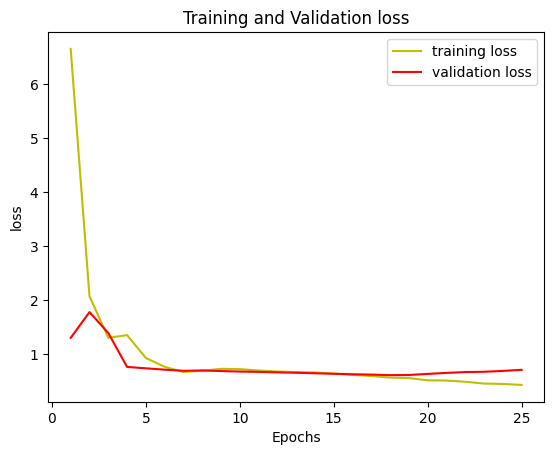

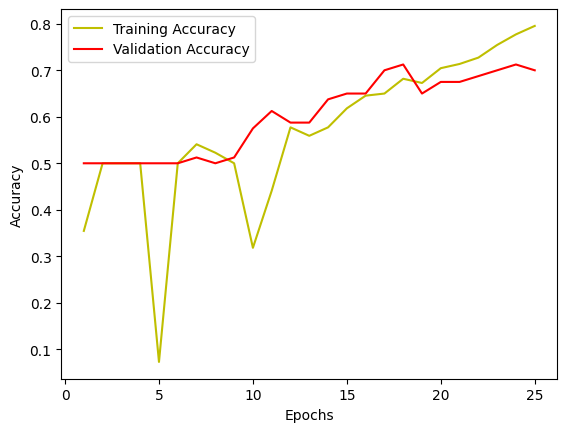

In [109]:
# plot the training and validation accuracy and loos at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label = 'validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 19ms/step
the prediction for this image is:  1
the prediction for this image is:  Male
the Actual for this image is:  1
the Actual for this image is:  Male


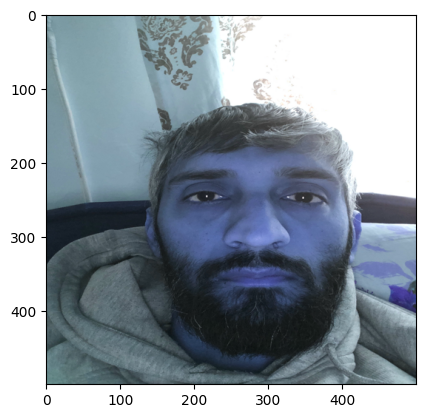

In [119]:
# Test the model on single image
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_image = np.expand_dims(img, axis = 0)
image_label_in_text = ''
Actual_image_label_in_text = ''
if y_test[n] == 1:
  Actual_image_label_in_text = 'Male'
else:
  Actual_image_label_in_text = 'Female'
if np.argmax(cnn.predict(input_image)) >= 0.5:
  image_label_in_text = 'Male'
else:
  image_label_in_text = 'Female'
# np.argmax(cnn.predict(input_image))
# cnn.predict(input_image)
print("the prediction for this image is: ", np.argmax(cnn.predict(input_image)))
print("the prediction for this image is: ", image_label_in_text)
print("the Actual for this image is: ", y_test[n])
print("the Actual for this image is: ", Actual_image_label_in_text)

In [120]:
# Evalute the model with all test data
_, accuracy =  cnn.evaluate(X_test, y_test)
print('Accuracy of the model is', (accuracy * 100.0), '%')

3/3 [==============================] - 0s 44ms/step - loss: 0.7102 - accuracy: 0.7000
Accuracy of the model is 69.9999988079071 %


3/3 [==============================] - 0s 43ms/step


<Axes: >

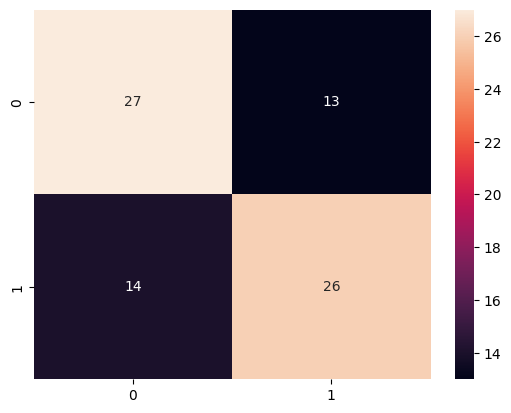

In [121]:
# confusion matrix
# mythreshold =  0.934401


y_prediction =[np.argmax(element) for element in cnn.predict(X_test)]
# y_prediction = (y_prediction >= mythreshold).astype(int)
confusion_Matrix = confusion_matrix(y_test, y_prediction)
snb.heatmap(confusion_Matrix, annot = True)

3/3 [==============================] - 0s 41ms/step


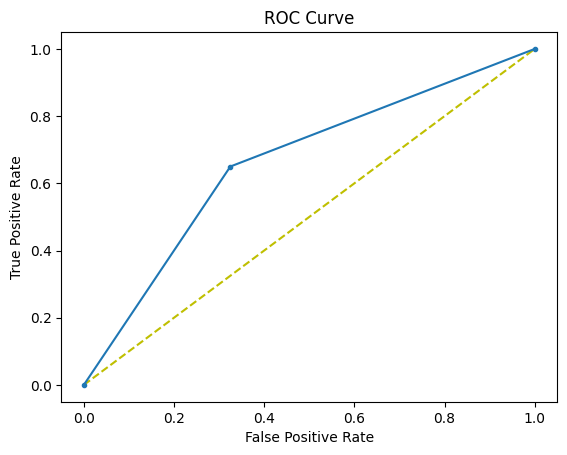

In [122]:
# ROC
from sklearn.metrics import roc_curve

y_predictions = (cnn.predict(X_test).ravel())
y_predictions =[np.argmax(element) for element in cnn.predict(X_test)]
len(y_predictions)
false_prediction, true_prediction, thresholds = roc_curve(y_test, y_predictions)
plt.figure(1)
plt.plot([0,1], [0,1], 'y--')
plt.plot(false_prediction, true_prediction, marker = '.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [123]:
# threshold
import pandas as pd
i = np.arange(len(true_prediction))
roc = pd.DataFrame({'tf' : pd.Series(true_prediction - (1 - true_prediction), index = i), 'threholds' : pd.Series(thresholds, index= i)})
ideal_roc_threshold = roc.iloc[(roc.tf-0).abs().argsort()[:1]] #Locate the point where the value is close to 0
print("Ideal threshold is : ", ideal_roc_threshold['threholds'])

Ideal threshold is :  1    1
Name: threholds, dtype: int64


In [124]:
# Area Under the Curve (AUC)

from sklearn.metrics import auc
area_under_the_curve_value = auc(false_prediction, true_prediction)
print('Area Under the Curve, AUC = ', area_under_the_curve_value)

Area Under the Curve, AUC =  0.6625
